In [41]:
import openpyxl
from openpyxl_image_loader import SheetImageLoader
import pandas as pd
import cv2

#loading the Excel File and the sheet
pxl_doc = openpyxl.load_workbook('/home/ubuntu/storage/Doc2Answer/stamp_detection/Mapping2.xlsx')
sheet = pxl_doc['Sheet1']

stamp_names = pd.read_excel('Mapping.xlsx')['Stamp Class'].values
#calling the image_loader
image_loader = SheetImageLoader(sheet)
images = {}
img_paths = []
#get the image (put the cell you need instead of 'A1')
for i in range(2, 78):
    image = image_loader.get(f'A{i}')
    stamp_name = stamp_names[i-2]
    image = image.convert('RGB')
    image = np.array(image)
    if image.max()<=1:
        image = (image * 255)
    image = image.astype(np.uint8)
    images[stamp_name] = image
    #saving the image
    img_path = f'catalogue/{stamp_name}.jpg'
    img_paths.append(img_path)
    cv2.imwrite(img_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

'big_green_horizontal_700'

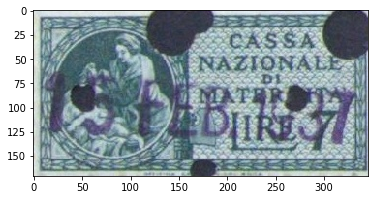

In [38]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
stamp_name

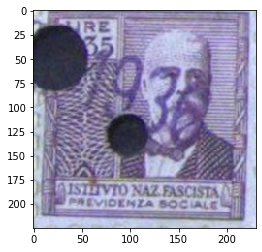

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(np.array(images['dark_purple_man_435']))
for img_path in img_paths:
    cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB).astype(np.float32) / 255.